In [3]:
import pandas as pd

# Create a sample dataset
data = pd.DataFrame({
    'text': [
        "Natural Language Processing is fascinating!",
        "Data Science and Machine Learning are closely related fields.",
        "Python is a great programming language for text processing.",
        "Text preprocessing involves cleaning and normalizing text data.",
        "Creating a word cloud is an exciting visualization technique."
    ]
})

# Preview the dataset
print(data)


                                                text
0        Natural Language Processing is fascinating!
1  Data Science and Machine Learning are closely ...
2  Python is a great programming language for tex...
3  Text preprocessing involves cleaning and norma...
4  Creating a word cloud is an exciting visualiza...


In [5]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [11]:
def preprocess_text(text):
    # Initialize lemmatizer
    lemmatizer = WordNetLemmatizer()
    # Define stop words
    stop_words = set(stopwords.words('english'))
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', str(text))
    # Tokenize and convert to lowercase
    tokens = word_tokenize(text.lower())
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing to the dataset
data['cleaned_text'] = data['text'].apply(preprocess_text)

# Preview processed data
print(data[['text', 'cleaned_text']].head())


                                                text  \
0        Natural Language Processing is fascinating!   
1  Data Science and Machine Learning are closely ...   
2  Python is a great programming language for tex...   
3  Text preprocessing involves cleaning and norma...   
4  Creating a word cloud is an exciting visualiza...   

                                        cleaned_text  
0            natural language processing fascinating  
1  data science machine learning closely related ...  
2  python great programming language text processing  
3  text preprocessing involves cleaning normalizi...  
4  creating word cloud exciting visualization tec...  


In [13]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


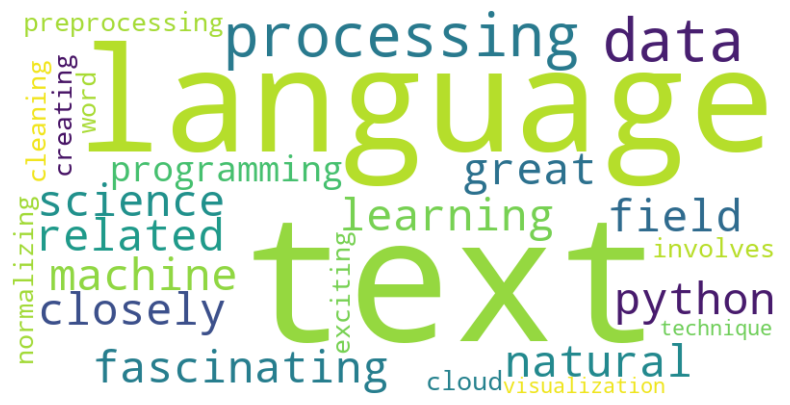

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all cleaned text
all_text = ' '.join(data['cleaned_text'])

# Create word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [17]:
from collections import Counter

# Count word frequencies
all_words = all_text.split()
word_counts = Counter(all_words)

# Display the most common words
print(word_counts.most_common(10))


[('text', 3), ('language', 2), ('processing', 2), ('data', 2), ('natural', 1), ('fascinating', 1), ('science', 1), ('machine', 1), ('learning', 1), ('closely', 1)]


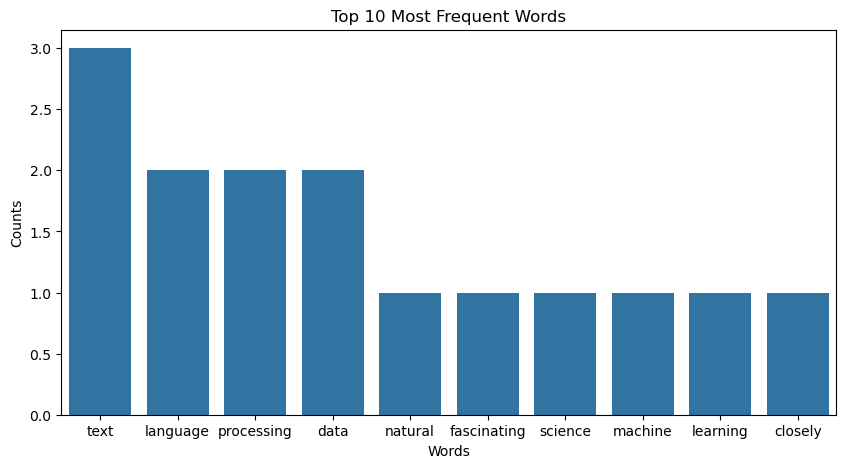

In [19]:
import seaborn as sns

# Plot the top 10 words
top_words = word_counts.most_common(10)
words, counts = zip(*top_words)

plt.figure(figsize=(10, 5))
sns.barplot(x=list(words), y=list(counts))
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.show()


In [23]:
pip install textblob


   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/626.3 kB ? eta -:--:--
   ---------------------------------------- 626.3/626.3 kB 3.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


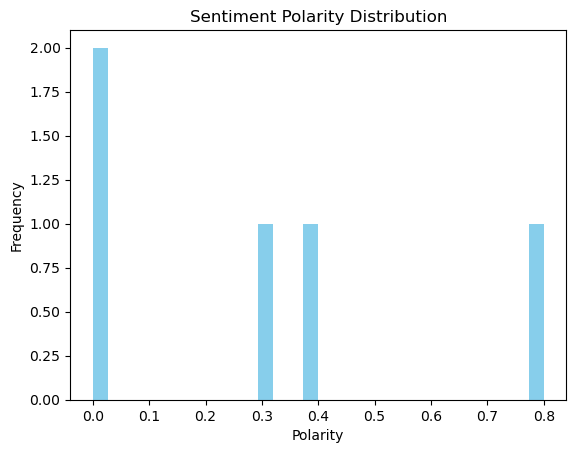

In [25]:
from textblob import TextBlob

# Compute sentiment polarity for each row
data['sentiment'] = data['cleaned_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Visualize sentiment distribution
plt.hist(data['sentiment'], bins=30, color='skyblue')
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()


In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Convert text to a document-term matrix
vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(data['cleaned_text'])

# Fit LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# Display topics
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx + 1}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])


Topic 1:
['language', 'processing', 'data', 'text']
Topic 2:
['language', 'processing', 'data', 'text']
Topic 3:
['language', 'processing', 'data', 'text']
Topic 4:
['language', 'processing', 'text', 'data']
Topic 5:
['data', 'text', 'language', 'processing']


C:\Users\HP\AppData\Local\Temp\ipykernel_9924\1603946053.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['sentiment'], palette='coolwarm')


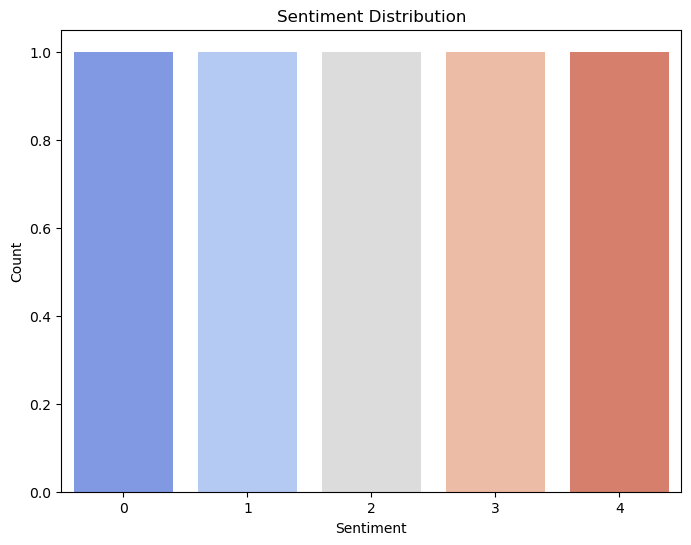

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(data['sentiment'], palette='coolwarm')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [33]:
import numpy as np

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Create the count matrix
cv = CountVectorizer(max_features=1000)
count_matrix = cv.fit_transform(data['cleaned_text'])

# Perform LDA
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_topic = lda_model.fit_transform(count_matrix)

# Plot the top terms for each topic
for i, topic in enumerate(lda_model.components_):
    print(f'Topic {i}: {", ".join(cv.get_feature_names_out()[np.argsort(topic)][:10])}')


Topic 0: cleaning, preprocessing, normalizing, involves, technique, visualization, word, cloud, exciting, creating
Topic 1: machine, closely, science, related, learning, field, preprocessing, normalizing, involves, cleaning
Topic 2: machine, closely, science, related, learning, field, preprocessing, normalizing, involves, cleaning
Topic 3: machine, closely, science, related, learning, field, technique, visualization, word, exciting
Topic 4: cleaning, preprocessing, normalizing, involves, science, related, learning, machine, closely, field


In [39]:
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Ensure that y_train is of integer type
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Train the classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train_encoded)

# Predict and evaluate
y_pred_encoded = classifier.predict(X_test)
y_pred = label_encoder.inverse_transform(y_pred_encoded)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')


Accuracy: 1.0
